In [1]:
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(platetools)))
suppressWarnings(suppressPackageStartupMessages(library(gridExtra)))
suppressWarnings(suppressPackageStartupMessages(library(cowplot)))
suppressWarnings(suppressPackageStartupMessages(library(viridis)))
suppressWarnings(suppressPackageStartupMessages(library(argparse)))    

In [ ]:
# set up argparse
parser <- arg_parser("Visualize regression results")

parser <- add_argument(parser, "--cell_type", help = "String of the type of cell used", required = TRUE)

args <- parse_args(parser)

cell_type <- args$cell_type

In [2]:
cell_type <- "SHSY5Y"

In [3]:

df_stats_path <- file.path(
    paste0("../results/regression/",cell_type,"/aggregated_with_nomic/model_stats.csv"
    )
)
df_variance_path <- file.path(
    paste0("../results/regression/",cell_type,"/aggregated_with_nomic/variance_r2_stats.csv"
    )
)
# import csv file
df <- read.csv(df_stats_path)
df_var <- read.csv(df_variance_path)

# set up figure path
enet_cp_fig_path <- paste0("../figures/regression/",cell_type,"/aggregated_with_nomic/")


# if path does not exist, create it
if (!file.exists(dirname(enet_cp_fig_path))) {
    print(dirname(enet_cp_fig_path))
    dir.create(dirname(enet_cp_fig_path), recursive = TRUE)
}

[1] "../figures/regression/SHSY5Y"


In [4]:
print(unique(df$shuffle))
print(length(unique(df$cytokine)))

[1] "final"             "shuffled_baseline"
[1] 187


[1] "../figures/regression/SHSY5Y/aggregated_with_nomic"


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


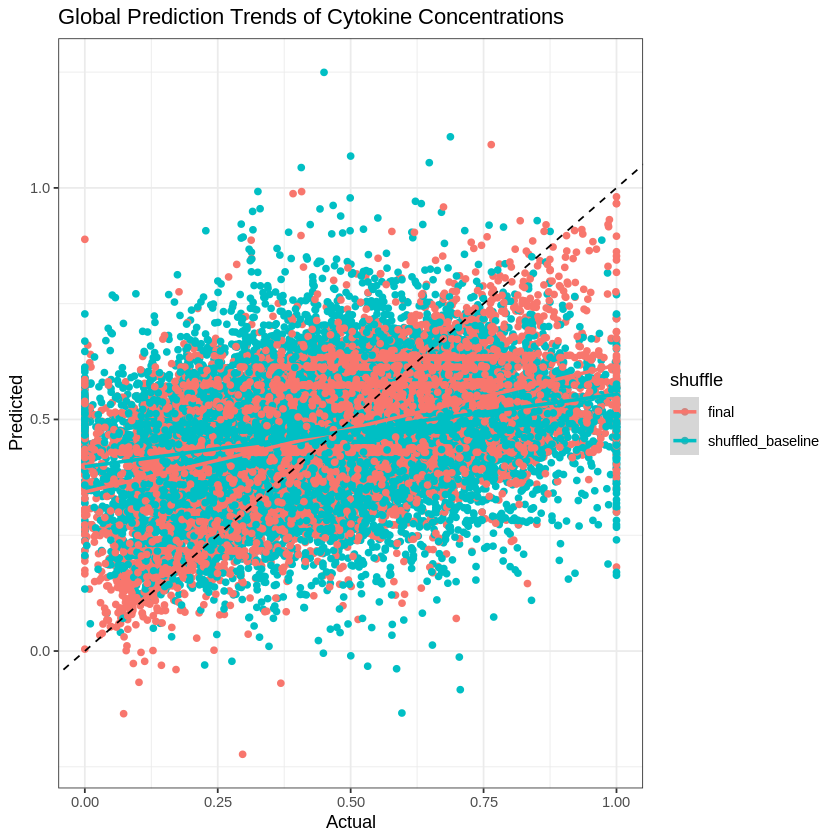

In [5]:
# set output path
global_prediction_trend_path <- file.path(paste0(enet_cp_fig_path,"global_prediction_trend.png"))
# if path does not exist, create it
if (!file.exists(dirname(global_prediction_trend_path))) {
    print(dirname(global_prediction_trend_path))
    dir.create(dirname(global_prediction_trend_path), recursive = TRUE)
}
# plot the data
global_prediction_trend <- (
    ggplot(df, aes(x=actual_value, y=predicted_value, col=shuffle)) 
    + geom_point() 
    + geom_smooth(method=lm, se=TRUE,) 
    + labs(x="Actual", y="Predicted") 
    + theme_bw()
    + labs(title="Global Prediction Trends of Cytokine Concentrations")
    # add y=x line
    + geom_abline(intercept = 0, slope = 1, linetype="dashed", color="black")
)

# save the plot
ggsave(global_prediction_trend_path, global_prediction_trend, width=5, height=5, dpi=500)
global_prediction_trend

In [6]:
head(df)

,explained_variance,neg_mean_absolute_error,neg_mean_squared_error,well,treatment,r2,cytokine,data_split,shuffle,predicted_value,actual_value,log10_neg_mean_absolute_error,log10_neg_mean_squared_error,log10_explained_variance
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,-0.001497557,-2.242678e-06,B15,DMSO_0.100_DMSO_0.025,0,GFbeta,train_data,final,0.4236797,0.42221619,2.8246165,5.6492330,0
2,1,-0.103838297,-1.078239e-02,B18,LPS_Nigericin_100.000_1.0_DMSO_0.025,0,GFbeta,train_data,final,0.4236797,0.32220138,0.9836424,1.9672849,0
3,1,-0.063803676,-4.070909e-03,B19,LPS_Nigericin_100.000_1.0_DMSO_0.025,0,GFbeta,train_data,final,0.4236797,0.48603330,1.1951543,2.3903086,0
4,1,-0.171724007,-2.948913e-02,B20,LPS_0.010_DMSO_0.025,0,GFbeta,train_data,final,0.4236797,0.25585852,0.7651690,1.5303380,0
5,1,-0.364728665,-1.330270e-01,C14,DMSO_0.100_DMSO_0.025,0,GFbeta,train_data,final,0.4236797,0.06724033,0.4380301,0.8760602,0
6,1,-0.134786208,-1.816732e-02,C20,LPS_0.100_DMSO_0.025,0,GFbeta,train_data,final,0.4236797,0.29195683,0.8703545,1.7407091,0


In [7]:
enet_cp_fig <- file.path(paste0(enet_cp_fig_path,"Predicted_vs_Actual_all_cytokines.pdf"))
pdf(file=enet_cp_fig)
# set plot size
options(repr.plot.width=6, repr.plot.height=8)
# facet by secrete 
for (i in 1:length(unique(df$cytokine))){
    sub_df <- df[df$cytokine == (unique(df$cytokine)[i]),]
    p <- (
        ggplot(sub_df, aes(x=actual_value, y=predicted_value, col=shuffle)) 
        + geom_point() 
        + geom_smooth(method=lm, se=TRUE, formula = y ~ x) 
        + labs(x="Actual", y="Predicted") 
        + theme_bw() 
        + ggtitle(unique(df$cytokine)[i])
        + ylim(0, 1)
        + xlim(0, 1)

    )
    
    plot(p)
}
dev.off()


Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows contain

png 
  2

In [8]:
# remove '[]' from the string in the column
df_var$r2 <- gsub("\\[|\\]", "", df_var$r2)
# set the column as numeric
df_var$r2 <- as.numeric(df_var$r2)
head(df_var)

,cytokine,data_split,shuffle,predicted_value,actual_value,r2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,XCL1(Lymphotactin),test_data,final,0.000000000,0.04788225,-0.01773091
2,XCL1(Lymphotactin),train_data,final,0.000000000,0.03334630,0.00000000
3,FGF-19,test_data,shuffled_baseline,0.003071285,0.02428805,-0.17014103
4,FGF-19,train_data,shuffled_baseline,0.003512650,0.02297245,-0.27020323
5,IF-epsilon,test_data,final,0.013943488,0.02768799,-0.00344800
6,IF-epsilon,train_data,final,0.014319244,0.02590526,0.78232526


Warning message:
“Removed 441 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 441 rows containing missing values (`geom_point()`).”


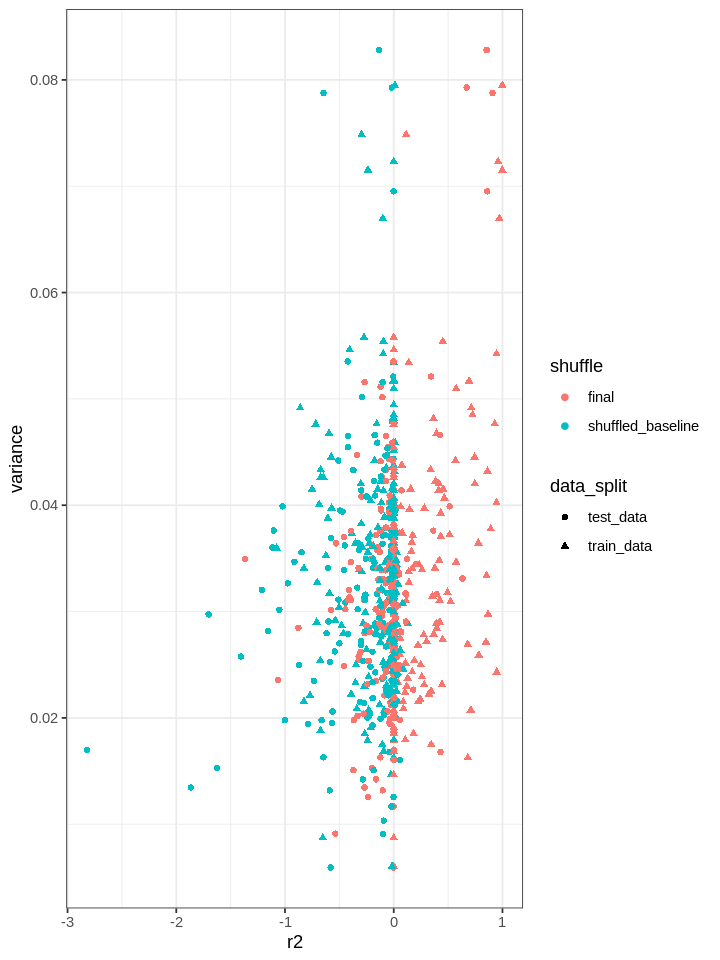

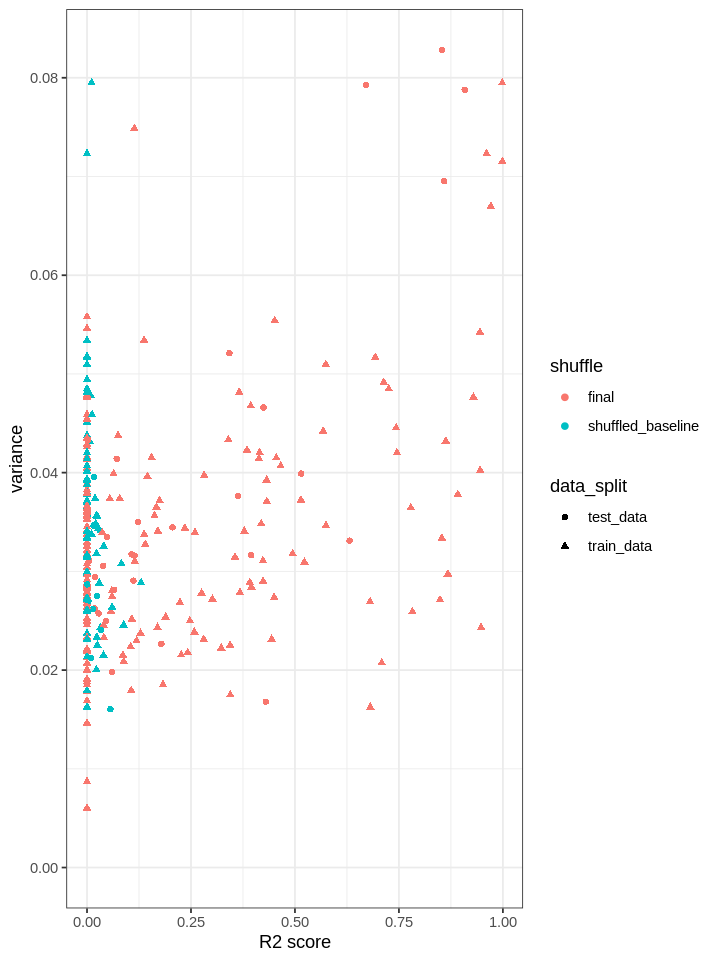

In [9]:
# set output path
global_variance_r2_path <- file.path(paste0(enet_cp_fig_path,"global_variance_r2.png"))
# if path does not exist, create it
if (!file.exists(dirname(global_prediction_trend_path))) {
    print(dirname(global_prediction_trend_path))
    dir.create(dirname(global_prediction_trend_path), recursive = TRUE)
}
# plot df_var df
variance_r2_plot <- (
    ggplot(df_var, aes(x=r2, y=actual_value,col=shuffle, shape = data_split)) 
    + geom_point() 
    # + geom_smooth(method=lm, se=TRUE) 
    + labs(x="r2", y="variance") 
    + theme_bw()
)
ggsave(global_variance_r2_path, variance_r2_plot, width=5, height=5, dpi=500)
variance_r2_plot

local_variance_r2_path <- file.path(paste0(enet_cp_fig_path,"local_variance_r2.png"))
# if path does not exist, create it
if (!file.exists(dirname(global_prediction_trend_path))) {
    print(dirname(global_prediction_trend_path))
    dir.create(dirname(global_prediction_trend_path), recursive = TRUE)
}
# same plot but only in the positive quadrant
variance_r2_plot <- (
    ggplot(df_var, aes(x=r2, y=actual_value, col=shuffle, shape = data_split)) 
    + geom_point() 
    + labs(x="R2 score", y="variance") 
    + theme_bw()
    + xlim(0, max(df_var$r2))
    + ylim(0, max(df_var$actual_value))
)
ggsave(local_variance_r2_path, variance_r2_plot, width=5, height=5, dpi=500)
variance_r2_plot

In [10]:
# remove all cytokines that have r2 < 0 for both test and train set
neg_r2 <- df_var[df_var$r2 < 0,]
remove_cytokine_list <- neg_r2[neg_r2$shuffle == "final",]$cytokine
# remove cytokines from df
df_var <- df_var[!(df_var$cytokine %in% remove_cytokine_list),]
# create a new column tha combine the shuffle columnm and the data_split column
df_var$shuffle_data_split <- paste0(df_var$shuffle, "_", df_var$data_split)

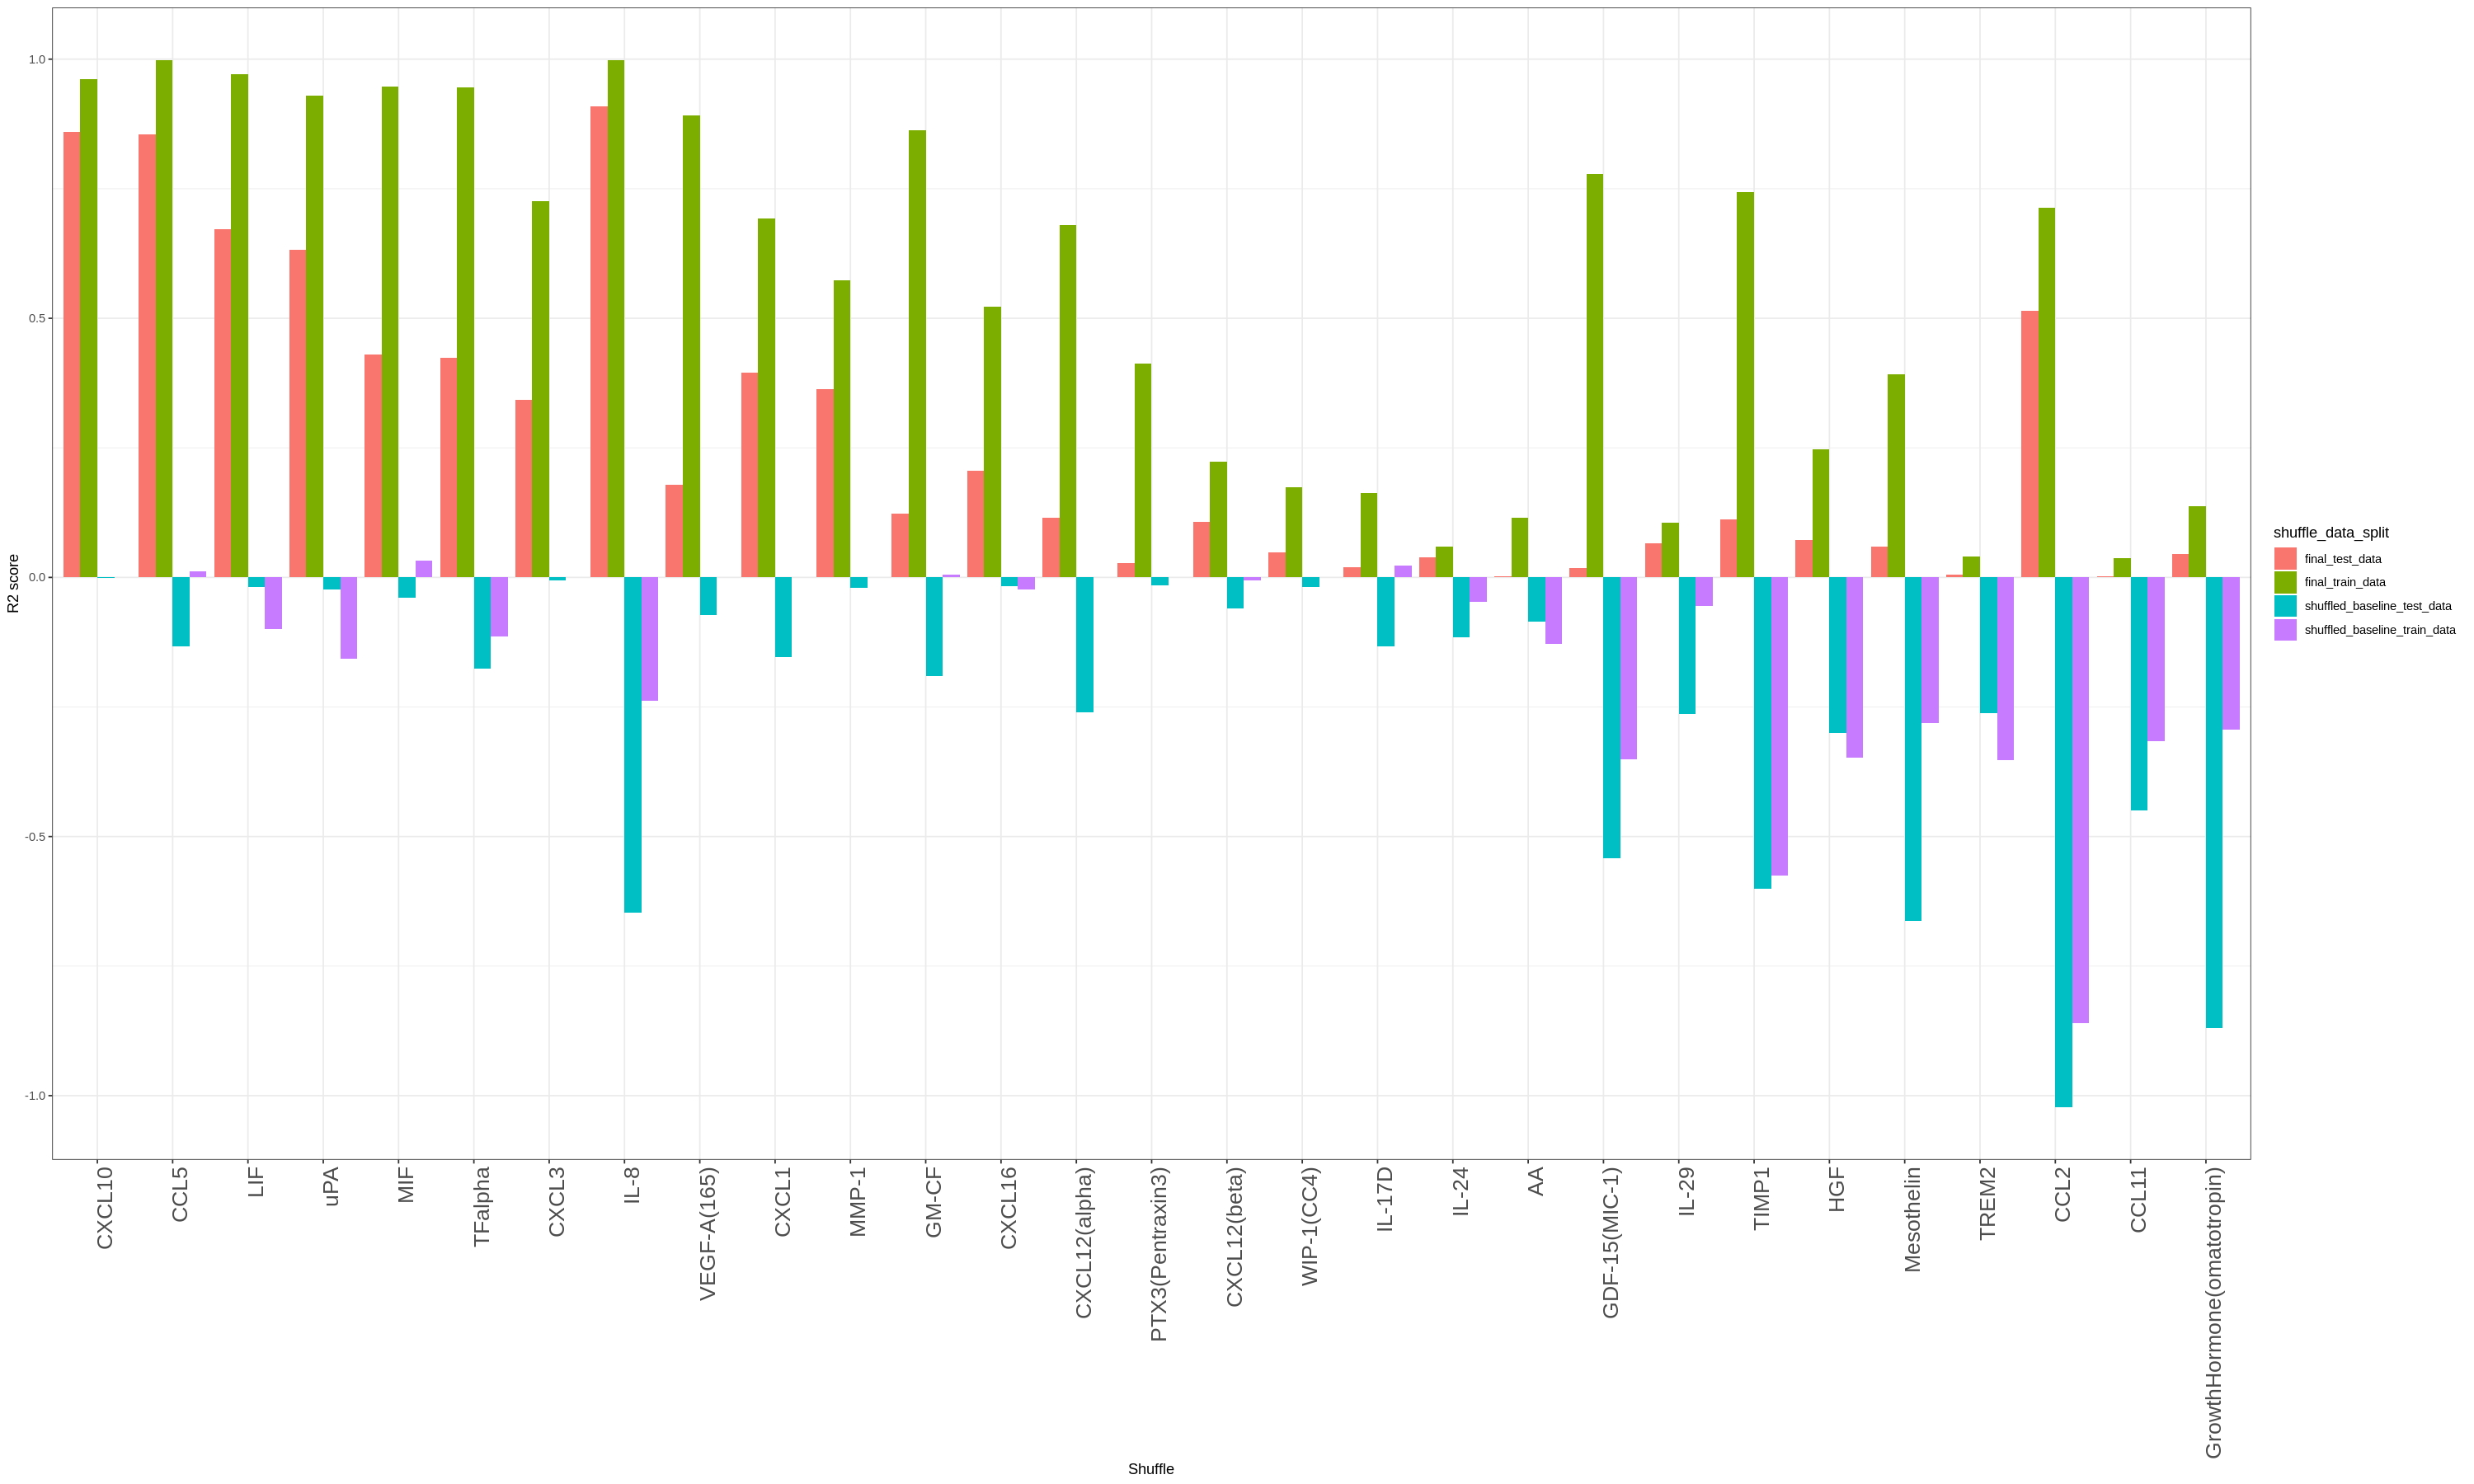

In [11]:

# set size of the plot
options(repr.plot.width=25, repr.plot.height=15)
# get only the final models
# df_var_final <- df_var[df_var$shuffle == "final",]
# set the order of the cytokines by the r2 score for the test set
# df_var_final$cytokine <- factor(df_var_pos$cytokine, levels = df_var_pos[order(df_var_pos$r2, decreasing = TRUE),]$cytokine)
# plot the df_var_pos df on a bar plot 
variance_r2_bar_plot <- (
    ggplot(df_var, aes(x = reorder(cytokine, r2, decreasing=T), y=r2, fill=shuffle_data_split)) 
    + geom_bar(stat="identity", position=position_dodge())
    + labs(x="Shuffle", y="R2 score") 
    + theme_bw()
    # make x ticks labels larger and rotate them 90 degrees
    + theme(axis.text.x = element_text(size=16, angle=90, hjust=1))

)
ggsave(file.path(paste0(enet_cp_fig_path,"variance_r2_bar_plot.png")), variance_r2_bar_plot, width=20, height=15, dpi=500)
variance_r2_bar_plot

In [12]:
# calculate the se of each metric for each shuffle, data_split, and cytokine in R
agg_df <- aggregate(log10_neg_mean_absolute_error ~ shuffle + data_split + cytokine + treatment, df, function(x) c(mean = mean(x), sd = sd(x)))
# split the log10_neg_mean_absolute_error column into two columns
agg_df <- cbind(agg_df, agg_df$log10_neg_mean_absolute_error)
# remove the log10_neg_mean_absolute_error column by name
agg_df <- agg_df[, !names(agg_df) %in% c('log10_neg_mean_absolute_error')]
# rename the columns 
colnames(agg_df) <- c("shuffle", "data_split", "cytokine", "treatment","mean_log10_neg_mean_absolute_error", "sd_log10_neg_mean_absolute_error")


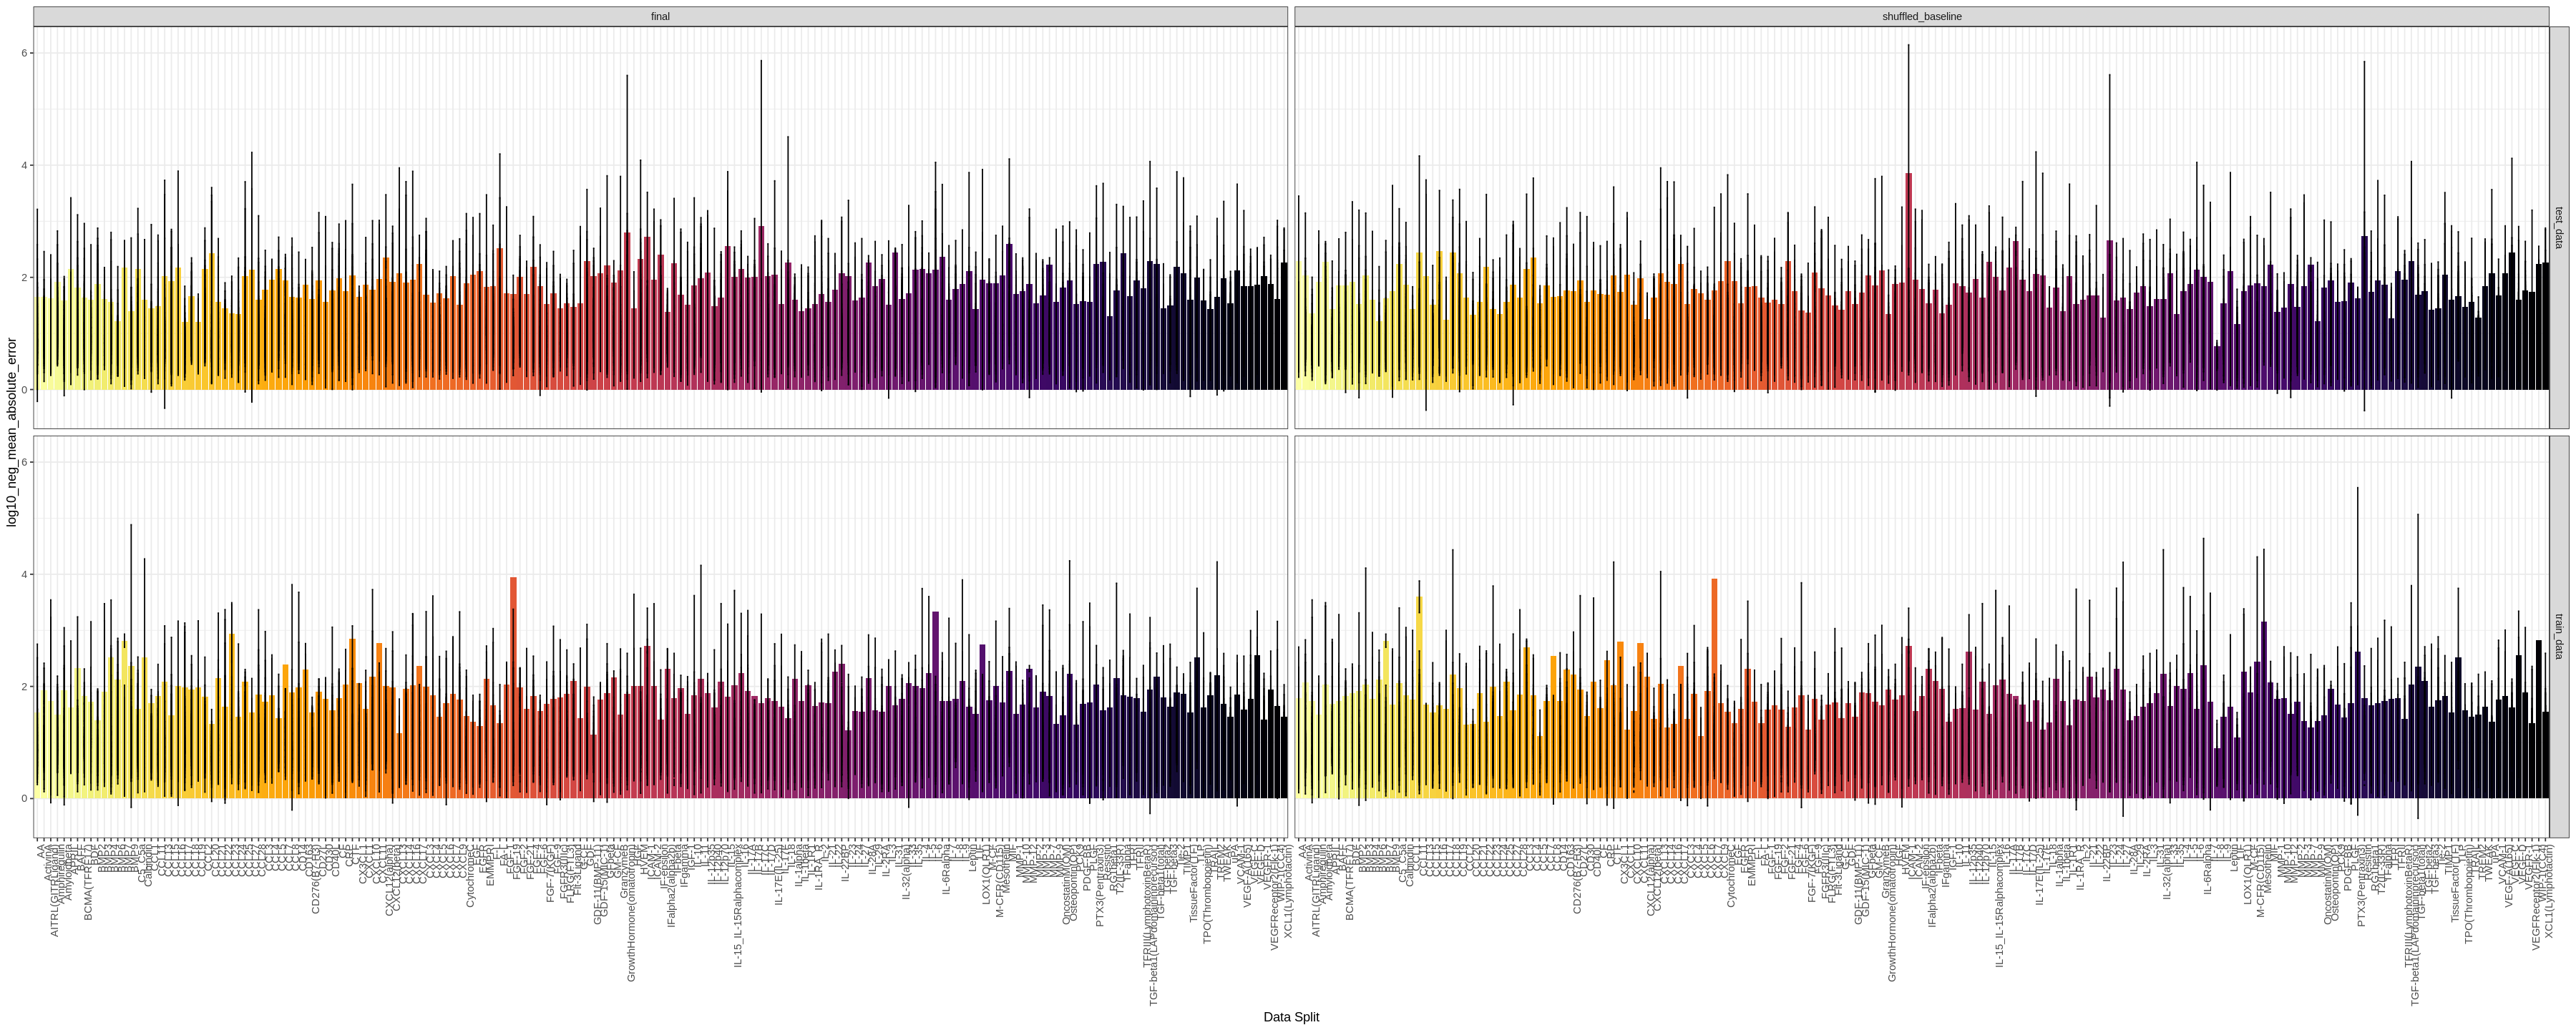

In [13]:
# set output path
prediction_metric <- file.path(paste0(enet_cp_fig_path,"prediction_metric.png"))
# if path does not exist, create it
if (!file.exists(dirname(global_prediction_trend_path))) {
    print(dirname(global_prediction_trend_path))
    dir.create(dirname(global_prediction_trend_path), recursive = TRUE)
}
# set plot size
options(repr.plot.width=30, repr.plot.height=12)



# plot a bar plot of the mean log10_neg_mean_absolute_error for each data split, cytokine, and shuffle with error bars
bar_plot <- (
    ggplot(agg_df, aes(x=cytokine, y=mean_log10_neg_mean_absolute_error, fill=cytokine)) 
    + geom_bar(stat="identity", position=position_dodge()) 
    + geom_errorbar(aes(ymin=mean_log10_neg_mean_absolute_error-sd_log10_neg_mean_absolute_error, ymax=mean_log10_neg_mean_absolute_error+sd_log10_neg_mean_absolute_error), width=.2, position=position_dodge(.9)) 
    + labs(x="Data Split", y="log10_neg_mean_absolute_error") 
    + theme_bw()
    + theme(axis.text.x = element_text(angle = 90, hjust = 1))
    + facet_grid(data_split	 ~ shuffle	)
    #add viridis color scale
    + scale_fill_viridis(discrete = TRUE, option = "inferno", direction = -1)
    # order the x axis by the mean of the log10_neg_mean_absolute_error
    # + scale_x_discrete(limits = temp_agg_df$cytokine[order(temp_agg_df$mean_log10_neg_mean_absolute_error)])
)
# detach the legend
# get the legend from the plot
bar_plot <- bar_plot + theme(legend.position="none")
ggsave(prediction_metric, bar_plot, width=30, height=12, dpi=500)
print(bar_plot)


In [14]:
# per cytokine graph
for ( i in 1:length(unique(agg_df$cytokine))){
    # print(unique(agg_df$cytokine)[i])
    tmp_df <- agg_df[agg_df$cytokine == unique(agg_df$cytokine)[i],]

    # set output path
    prediction_metric <- file.path(paste0(enet_cp_fig_path,"individual_cytokines/prediction_metric",unique(agg_df$cytokine)[i],".png"))
    # if path does not exist, create it
    if (!file.exists(dirname(global_prediction_trend_path))) {
        print(dirname(global_prediction_trend_path))
        dir.create(dirname(global_prediction_trend_path), recursive = TRUE)
    }
    # set plot size
    options(repr.plot.width=12, repr.plot.height=12)
    # plot a bar plot of the mean log10_neg_mean_absolute_error for each data split, cytokine, and shuffle with error bars
    bar_plot <- (
        ggplot(tmp_df, aes(x=data_split, y=mean_log10_neg_mean_absolute_error, fill=shuffle)) 
        + geom_bar(stat="identity", position=position_dodge()) 
        + geom_errorbar(aes(ymin=mean_log10_neg_mean_absolute_error-sd_log10_neg_mean_absolute_error, ymax=mean_log10_neg_mean_absolute_error+sd_log10_neg_mean_absolute_error), width=.2, position=position_dodge(.9)) 
        + labs(x="Data Split", y="log10_neg_mean_absolute_error") 
        + ggtitle(unique(agg_df$cytokine)[i])
        + theme_bw()
        + theme(axis.text.x = element_text(angle = 90, hjust = 1))
        
    )
    # detach the legend
    # get the legend from the plot
    ggsave(prediction_metric, bar_plot, width=5, height=5, dpi=500)
    bar_plot
}

## Make Various PlateMap Figures

In [15]:
# set lists to iterate over
list_of_cytokines <- unique(df$cytokine)
list_of_data_frames <- list('final', 'shuffled_baseline')

In [16]:
pdf(file=file.path(paste0(enet_cp_fig_path,"prediction_per_well_platemap_all_cytokines.pdf"))
 )
# set plot size
options(repr.plot.width=8, repr.plot.height=8)
for (df_type in (list_of_data_frames)){
    for (cytokine in list_of_cytokines){
        # if statement to determine which dataframe to use
        # filter for shuffled data or non-shuffled data
        if (df_type == 'final'){
            shuffle_type_df <- df[df$shuffle == "final",]
            title <- paste0("Predictive Performance of ", cytokine, " per Well (Final model)")
        } else if (df_type == 'shuffled_baseline'){
            shuffle_type_df <- df[df$shuffle == "shuffled_baseline",]
            title <- paste0("Predictive Performance of ", cytokine, " per Well (Shuffled_baseline model)")
        }
        # from the shuffled data, filter for the cytokine of interest
        cytokine_df <- shuffle_type_df[shuffle_type_df$cytokine == cytokine,]
        # plot the data on a plate map
        platemap_plot <- (
            raw_map(
            data = cytokine_df$log10_neg_mean_absolute_error,
            well = cytokine_df$well,
            plate = 384)
            + ggtitle(title)
            + theme_dark() 
            + ggplot2::geom_point(aes(shape = cytokine_df$data_split)) 
            )
            plot(platemap_plot)
    }
}
dev.off()

Warning message:
“Warning: Your well label count ( 100 ) covers less than half the selected plate( 384 ).
Are you sure argument 'plate' is correct for the number of wells in your data?
note: Default is a 96-well plate.”
Warning message:
“Warning: Your well label count ( 100 ) covers less than half the selected plate( 384 ).
Are you sure argument 'plate' is correct for the number of wells in your data?
note: Default is a 96-well plate.”
Warning message:
“Warning: Your well label count ( 100 ) covers less than half the selected plate( 384 ).
Are you sure argument 'plate' is correct for the number of wells in your data?
note: Default is a 96-well plate.”
Warning message:
“Warning: Your well label count ( 100 ) covers less than half the selected plate( 384 ).
Are you sure argument 'plate' is correct for the number of wells in your data?
note: Default is a 96-well plate.”
Warning message:
“Warning: Your well label count ( 100 ) covers less than half the selected plate( 384 ).
Are you sure a

png 
  2

Warning message:
“Warning: Invalid plate selection. The well data given ( 37400 ) has more entries then number of wells in the selected plate ( 384 ).
Are you sure argument 'plate' is correct for the number of wells in your data?
note: Default is a 96-well plate.”


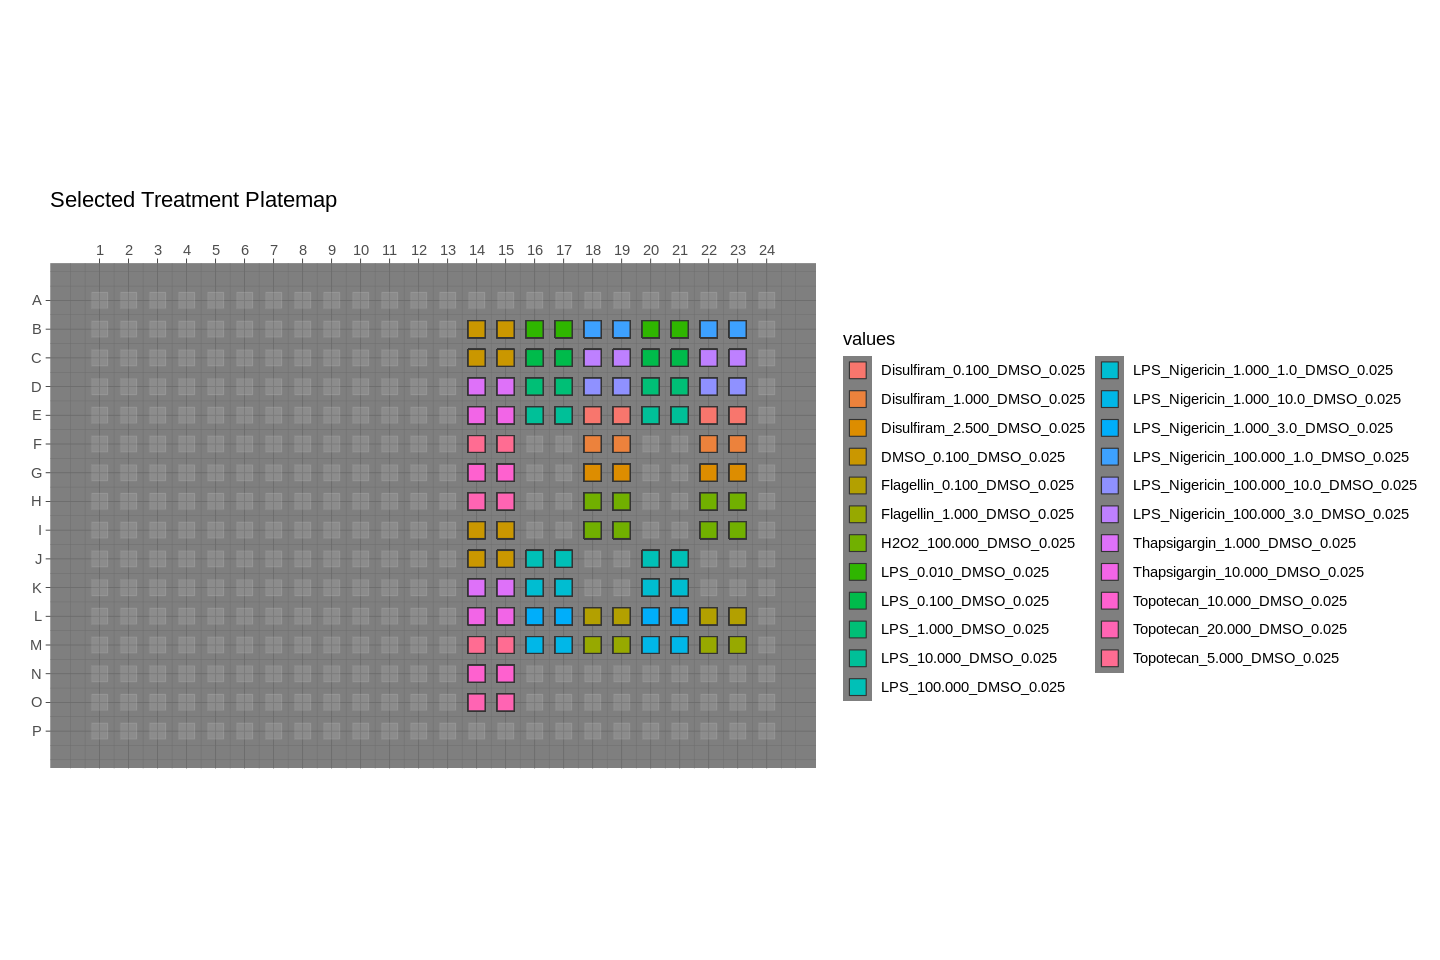

In [17]:
treatment_well_platemap <- file.path(paste0(enet_cp_fig_path,"treatment_platemap.png"))
# plot size set
options(repr.plot.width=12, repr.plot.height=8)
platemap_plot <- (
    raw_map(
        data = df$treatment,
        well = df$well,
        plate = 384)
    + ggtitle("Selected Treatment Platemap") 
    + theme_dark() 
)
ggsave(treatment_well_platemap, platemap_plot, width=12, height=8, dpi=500)
platemap_plot

In [18]:
# generate a platemap plot for the meta data
# read in the platemap data
platemap_df_path <- "../../../data/Interstellar_plate2_platemap.csv"
platemap_df <- read.csv(platemap_df_path)
# if cell_type is blank, set it to "blank"
platemap_df$cell_type[platemap_df$cell_type == ""] <- "blank"
# if treatment is blank, set it to "blank"
platemap_df$inducer1[platemap_df$inducer1 == ""] <- "blank"

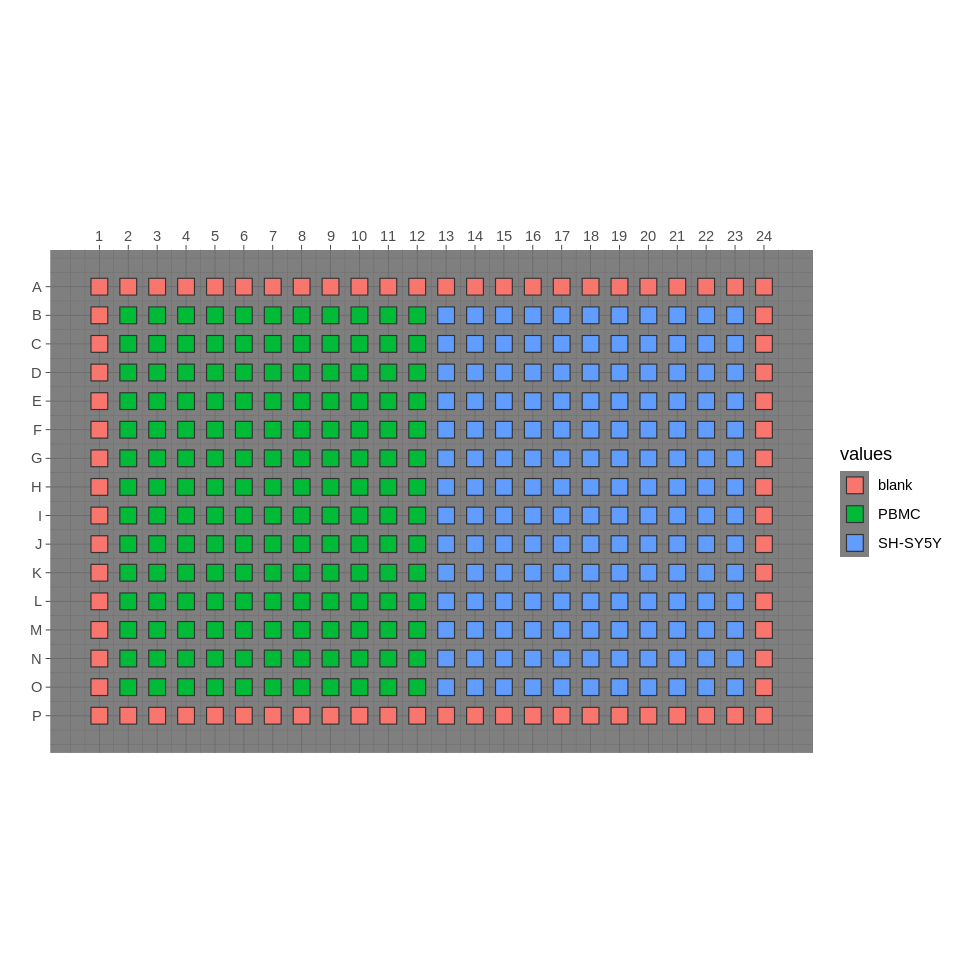

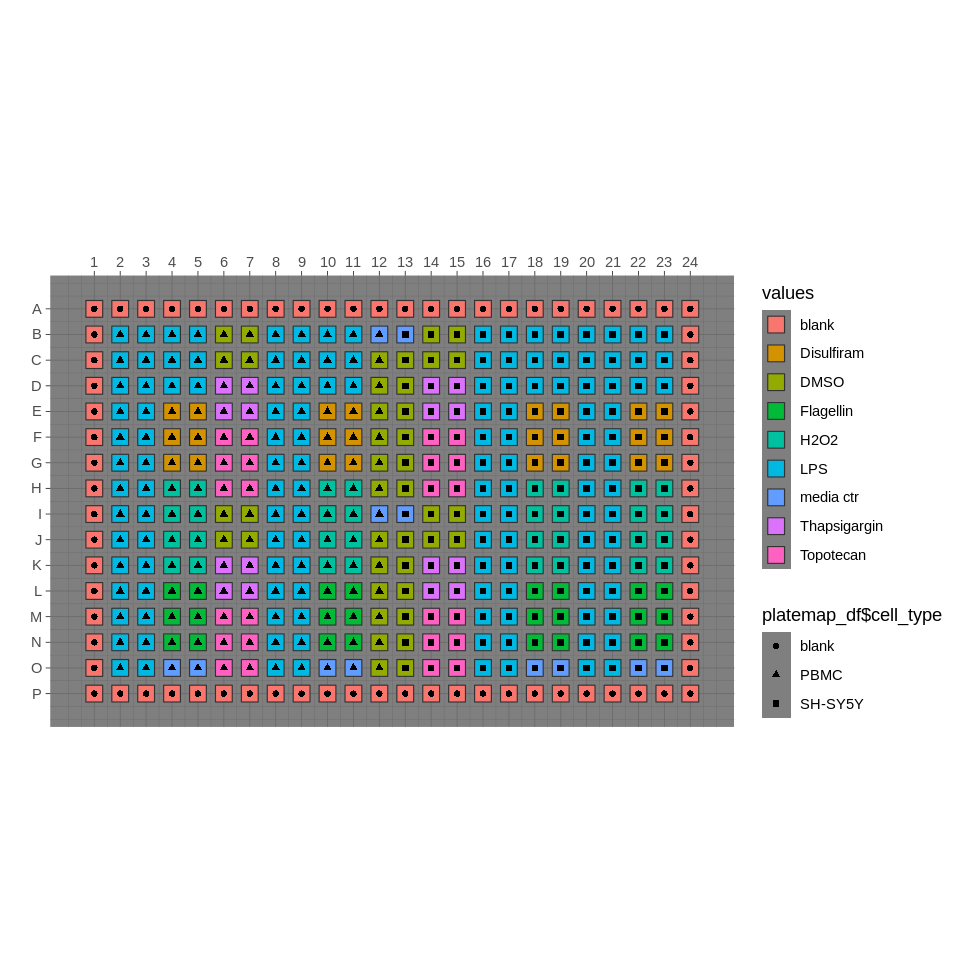

In [19]:
# plot size 
options(repr.plot.width=8, repr.plot.height=8)
# platemap of experimental contitions (cell type and inducer)
cell_type_well_platemap <- file.path(paste0(enet_cp_fig_path,"cell_type_well_platemap.png"))
# if path does not exist, create it
if (!file.exists(dirname(global_prediction_trend_path))) {
    print(dirname(global_prediction_trend_path))
    dir.create(dirname(global_prediction_trend_path), recursive = TRUE)
}
platemap_plot <- (
    raw_map(
        data = platemap_df$cell_type,
        well = platemap_df$well_id,
        plate = 384)
    + theme_dark() 
)
ggsave(cell_type_well_platemap, platemap_plot, width=5, height=5, dpi=500)
platemap_plot


inducer_well_platemap <- file.path(paste0(enet_cp_fig_path,"inducer_well_platemap.png"))
# if path does not exist, create it
if (!file.exists(dirname(global_prediction_trend_path))) {
    print(dirname(global_prediction_trend_path))
    dir.create(dirname(global_prediction_trend_path), recursive = TRUE)
}
platemap_plot <- (
    raw_map(
        data = platemap_df$inducer1,
        well = platemap_df$well_id,
        plate = 384)
    + theme_dark() 
    + ggplot2::geom_point(aes(shape = platemap_df$cell_type)) 
)
ggsave(inducer_well_platemap, platemap_plot, width=8, height=8, dpi=500)
platemap_plot